In [1]:
import matplotlib

In [2]:
font = {'family' : 'sans-serif',
        #'size'   : 18
       }

matplotlib.rc('font', **font)

In [3]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [4]:
from sklearn.metrics import r2_score

In [5]:
models = set([ff.split('/')[-1].split("_")[0] for ff in glob("./results_no_aug/*")])

In [6]:
models = list(set([ff.split('/')[-1].split("_")[0] for ff in glob("./results_aug_without_window/*")]))

In [7]:
models

['blstm1',
 'lstmfcn',
 'mlp4',
 'lstm1',
 'vgg',
 'lstm1v0',
 'lstm2',
 'resnet',
 'lenet',
 'blstm2']

In [8]:
len(models)

10

In [9]:
 models  = [
      'mlp4',
      'lenet',
      'vgg',
      'resnet',
      'lstm1',
      'lstm2',
      'lstmfcn',
      'blstm1',
      'blstm2',
      'lstm1v0',
]

In [10]:
# colors = [[27,158,119],
#           [217,95,2],
#           [117,112,179],
#           [231,41,138],
#           [102,166,30],
#           [230,171,2]]

In [11]:
sample_sizes = np.array([100, 175, 350, 700, 1000, 1453])

In [12]:
sz_for_opt = sample_sizes[:, None] + np.zeros((6, 10))

In [13]:
import scipy.optimize as opt

In [14]:
from matplotlib import cm

In [15]:
colors = cm.tab10.colors

colors = colors[:len(models)] + ([0, 0, 0], ) 

# colors = np.array([[27, 158, 119],
#                    [217, 95, 2],
#                    [117, 112, 179],
#                    [231, 41, 138],
#                    [102, 166, 30],
#                    [230, 171, 2]]) / 255

In [16]:
augmentations = [0, 40, 20, 10, 5, 2.5, 1]

In [17]:
# models = [models[0]] + models[2:]

In [18]:
# models = models[:-1]

In [19]:
# models

In [20]:
# Below 
# - Use different markers for different models 
# - Play more with linewidth/linestyle for model fits.
# - 

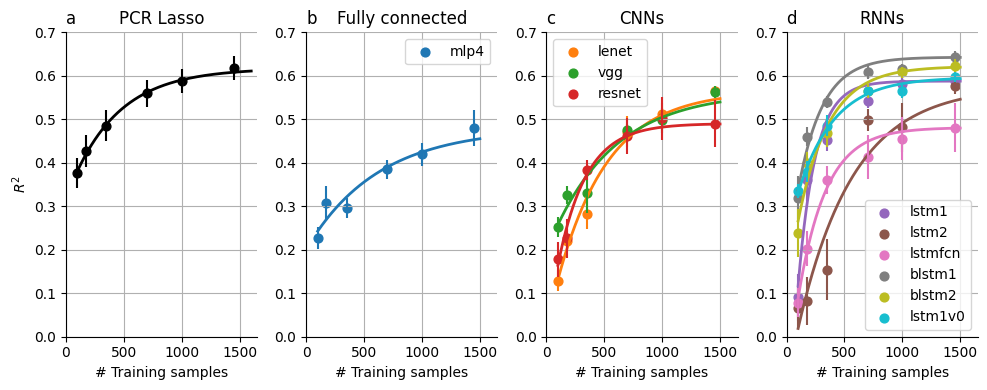

In [55]:
models_for_fig1 = [['mlp4'],
                   ['lenet', 'vgg', 'resnet'], 
                   ['lstm1', 'lstm2', 'lstmfcn', 'blstm1', 'blstm2','lstm1v0']]

letters = ["b", "c", "d"]

labels_for_fig1 = ['Fully connected', 'CNNs', 'RNNs']

idx_in_colors = 0
fig, axes = plt.subplots(1, 4)

kk = 0 
for jj, model_class in enumerate(models_for_fig1):
    ax = axes.flat[jj + 1]
    for mm, model in enumerate(models_for_fig1[jj]):
        r2 = np.zeros((6, 10))
        for ii, sample_size in enumerate(range(6, 0, -1)):
            result = pd.read_csv(f'./results_no_aug/{model}_{sample_size}_pred.csv')
            #fig, ax = plt.subplots()
            for run in range(10):
                this = result[result["run"] == run]
                # ax.scatter(this["y_test"], this["y_pred"])
                # ax.set_xlabel("Age (test set)")
                # ax.set_ylabel("Age prediction")
                # ax.plot([5, 25], [5, 25], 'k--')
                r2[ii, run] = np.max([r2_score(this["y_test"], this["y_pred"]), 0])

        max_acc = np.mean(r2[-1, :])
        def learning(x, min_acc, k):
            return max_acc - (max_acc - min_acc) * np.exp(-1 * (x - np.min(x)) / k)
        p, cov = opt.curve_fit(learning, sz_for_opt.ravel(), r2.ravel(), p0=[0, 100], bounds=[(0, 0), (1, np.inf)])
        ax.plot(np.arange(np.min(sample_sizes), 1500), learning(np.arange(np.min(sample_sizes), 1500), *p), color=colors[idx_in_colors], linewidth=2.0)
        ax.scatter(sample_sizes, np.mean(r2, 1), label=model, color=colors[idx_in_colors], s=40)
        ax.errorbar(sample_sizes, np.mean(r2, 1), yerr=np.std(r2, 1) / np.sqrt(9),  linestyle='None',  color=colors[idx_in_colors])
        ax.set_ylim([0, 0.7])
        ax.set_xlim([0, 1650])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid("on")
        idx_in_colors += 1
        ax.set_xlabel("# Training samples") 
        ax.set_title(f"{labels_for_fig1[jj]}")
        ax.set_title(letters[jj], loc='left', fontsize='large')

        ax.legend()
#ax.set_ylabel("Coefficient of determination ($R^2$)")


# fig, ax = plt.subplots()
ax = axes.flat[0]

jj = len(models)

r2 = np.zeros((6, 10))
for ii, sample_size in enumerate(range(6, 0, -1)):
    result = pd.read_csv(f'./results_no_aug/pcrlasso_{sample_size}_pred.csv')
    for run in range(10):
        this = result[result["run"] == run]
        r2[ii, run] = np.max([r2_score(this["y_test"], this["y_pred"]), 0])

max_acc = np.mean(r2[-1, :])
def learning(x, min_acc, k):
    return max_acc - (max_acc - min_acc) * np.exp(-1 * (x - np.min(x)) / k)

p, cov = opt.curve_fit(learning, sz_for_opt.ravel(), r2.ravel(), p0=[0, 100], bounds=[(0, 0), (1, np.inf)])
ax.plot(np.arange(1500) + np.min(sample_sizes), learning(np.arange(1500) + np.min(sample_sizes), *p), color="k", linewidth=2.0)
ax.scatter(sample_sizes, np.mean(r2, 1), label="pcrlasso", color="k", s=40)
ax.errorbar(sample_sizes, np.mean(r2, 1), yerr=np.std(r2, 1) / np.sqrt(9),  linestyle='None', color="k")

# r2 = np.zeros((6, 10))
# for ii, sample_size in enumerate(range(6, 0, -1)):
#     result = pd.read_csv(f'./results_pcrlasso/lasso_{sample_size}_pred.csv')
#     for run in range(10):
#         this = result[result["run"] == run]
#         r2[ii, run] = np.max([r2_score(this["y_test"], this["y_pred"]), 0])

# max_acc = np.mean(r2[-1, :])
# p, cov = opt.curve_fit(learning, sz_for_opt.ravel(), r2.ravel(), p0=[0, 100], bounds=[(0, 0), (1, np.inf)])
# ax.plot(np.arange(1500) + np.min(sample_sizes), learning(np.arange(1500) + np.min(sample_sizes), *p), color="C1", linewidth=2.0)
# ax.scatter(sample_sizes, np.mean(r2, 1), label="lasso", color="C1", s=40)
# ax.errorbar(sample_sizes, np.mean(r2, 1), yerr=np.std(r2, 1) / np.sqrt(9),  linestyle='None', color="C1")

ax.set_ylim([0, 0.7])
ax.set_xlabel("# Training samples") 
ax.set_title("PCR Lasso")
ax.set_ylabel("$R^2$")
# ax.yaxis.set_label_coords(-0.2, -1)
ax.set_xlim([0, 1650])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid("on")
ax.set_title("a", loc='left', fontsize='large')

# plt.legend()


fig.set_size_inches([10, 4])
fig.set_tight_layout("tight")
fig.savefig("/Users/arokem/Documents/papers/2022-convnets-tractometry/learning-curves-noaug.png", bbox_inches='tight')

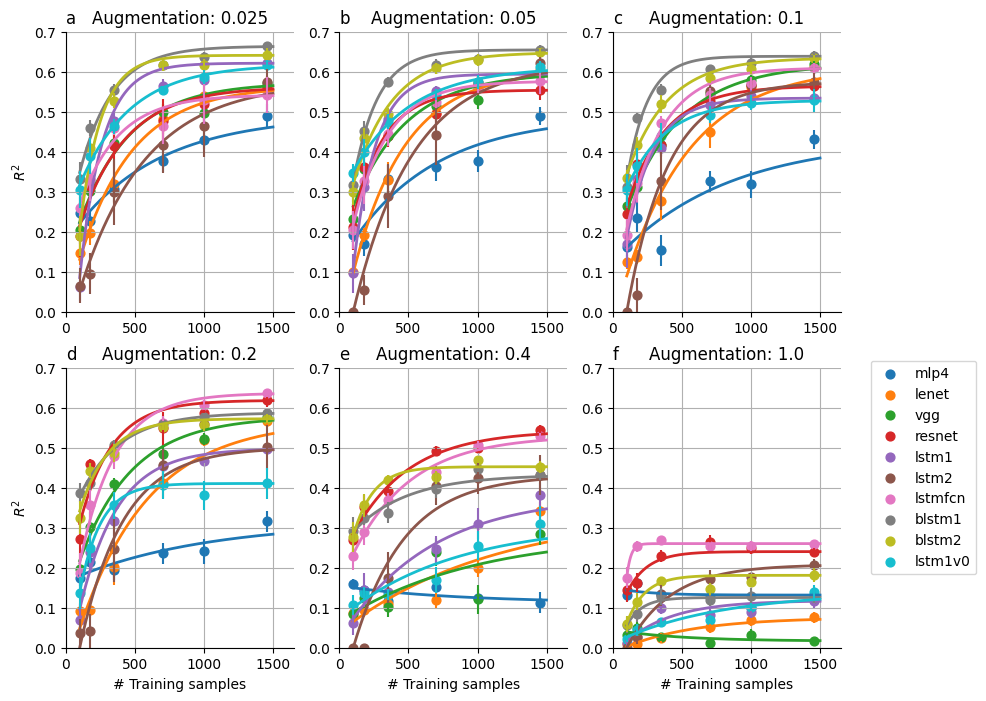

In [22]:
max_acc_models = np.zeros((len(models) + 1, len(augmentations)))
max_acc_errors = np.zeros((len(models) + 1, len(augmentations)))

fig, axes = plt.subplots(2, 3)
params = np.zeros((len(models)+1, len(augmentations), 2))

letters = ["a", "a", "b", "c", "d", "e", "f"]


for kk, aug in enumerate(augmentations):
    ax = axes.flat[kk-1]
    for jj, model in enumerate(models):
        r2 = np.zeros((6, 10))
        for ii, sample_size in enumerate(range(6, 0, -1)):
            if aug == 0: 
                result = pd.read_csv(f'./results_no_aug/{model}_{sample_size}_pred.csv')
            else: 
                result = pd.read_csv(f'./results_aug_without_window/{model}_aug{aug}_{sample_size}_pred.csv')

            #fig, ax = plt.subplots()
            for run in range(10):
                this = result[result["run"] == run]
                # ax.scatter(this["y_test"], this["y_pred"])
                # ax.set_xlabel("Age (test set)")
                # ax.set_ylabel("Age prediction")
                # ax.plot([5, 25], [5, 25], 'k--')
                r2[ii, run] = np.max([r2_score(this["y_test"], this["y_pred"]), 0])
        
        max_acc = np.mean(r2[-1, :])
        max_acc_models[jj, kk] = max_acc
        max_acc_errors[jj, kk] = np.std(r2[-1, :]) / np.sqrt(9)
        def learning(x, min_acc, k):
            return max_acc - (max_acc - min_acc) * np.exp(-1 * (x - np.min(x)) / k)
        p, cov = opt.curve_fit(learning, sz_for_opt.ravel(), r2.ravel(), p0=[0, 100], bounds=[(0, 0), (1, np.inf)])
        if aug > 0:
            ax.plot(np.arange(np.min(sample_sizes), 1500), learning(np.arange(np.min(sample_sizes), 1500), *p), color=colors[jj], linewidth=2.0)
            ax.scatter(sample_sizes, np.mean(r2, 1), label=model, color=colors[jj], s=40)
            ax.errorbar(sample_sizes, np.mean(r2, 1), yerr=np.std(r2, 1) / np.sqrt(9),  linestyle='None',  color=colors[jj])
            if aug == 0:
                ax.set_title(f"No augmentation")
            else:
                ax.set_title(f"Augmentation: {1/aug}")
            
            ax.set_title(letters[kk], loc='left', fontsize='large')
            ax.set_ylim([0, 0.7])
            ax.set_xlim([0, 1650])
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.grid("on")
        params[jj, kk] = p

ax.legend(bbox_to_anchor=(1.1, 1.05))
    #ax.set_xlabel("# Training samples") 
    #ax.set_ylabel("Coefficient of determination ($R^2$)")

fig.set_size_inches([10, 8])

for aa in axes[1]:
    aa.set_xlabel("# Training samples")

for aa in axes[:, 0]:
    aa.set_ylabel("$R^2$")

fig.savefig("/Users/arokem/Documents/papers/2022-convnets-tractometry/augmentations.png", bbox_inches='tight')


jj = len(models)

r2 = np.zeros((6, 10))
for ii, sample_size in enumerate(range(6, 0, -1)):
    result = pd.read_csv(f'./results_no_aug/pcrlasso_{sample_size}_pred.csv')
    for run in range(10):
        this = result[result["run"] == run]
        r2[ii, run] = np.max([r2_score(this["y_test"], this["y_pred"]), 0])

max_acc = np.mean(r2[-1, :])
def learning(x, min_acc, k):
    return max_acc - (max_acc - min_acc) * np.exp(-1 * (x - np.min(x)) / k)
max_acc_models[-1, 0] = max_acc
max_acc_models[-1, 1:] = np.nan
max_acc_errors[-1, 0] = np.std(r2[-1, :]) / np.sqrt(9)
max_acc_errors[-1, 1:] = np.nan

p, cov = opt.curve_fit(learning, sz_for_opt.ravel(), r2.ravel(), p0=[0, 100], bounds=[(0, 0), (1, np.inf)])
params[jj, 0] = p

In [23]:
1/40

0.025

In [24]:
import seaborn as sns

In [25]:
# Below: 
# - Plot as points instead of bars
# - Think more about errorbars. Resampling? Different curve fits? 


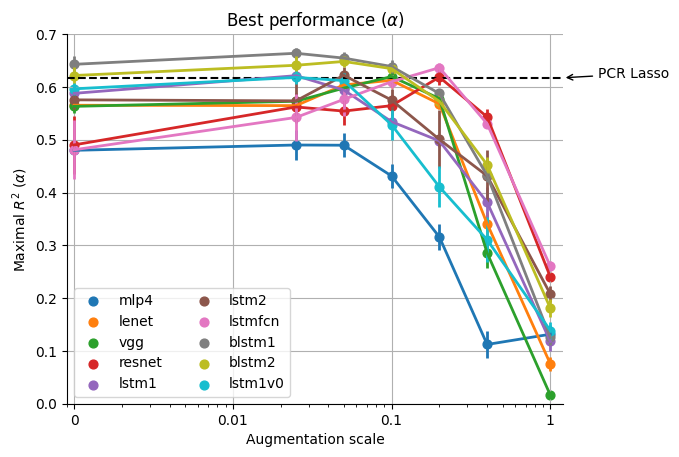

In [26]:
fig, ax = plt.subplots()
for ii in range(len(models)):
    ax.scatter([0.001, 1/40, 1/20, 1/10, 1/5, 1/2.5, 1], max_acc_models[ii], s=40, color=colors[ii], label=models[ii])
    ax.errorbar([0.001, 1/40, 1/20, 1/10, 1/5, 1/2.5, 1], max_acc_models[ii], 
                max_acc_errors[ii], linewidth=2.0, color=colors[ii])
    ax.set_xscale("log")
    ax.set_xlim([0.0009, 1.2])
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [max_acc_models[-1, 0], max_acc_models[-1, 0]], 'k--')
ax.set_ylabel(r"Maximal $R^2$ ($\alpha$)")
ax.set_xlabel("Augmentation scale")
ax.set_title(r"Best performance ($\alpha$)")
ax.set_xticks([0.001, 0.01, 0.1, 1])
ax.set_xticklabels(["0", "0.01", "0.1", "1"])
ax.annotate("PCR Lasso",[1.2, max_acc_models[-1, 0]], [2.0, max_acc_models[-1, 0]], arrowprops=dict(arrowstyle="->"))
ax.legend([],[], frameon=False)
ax.set_ylim([0, 0.7])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid("on")
ax.legend(ncols=2)

fig.savefig("/Users/arokem/Documents/papers/2022-convnets-tractometry/alpha.png", bbox_inches='tight')

In [27]:
models[7]

'blstm1'

In [28]:
max_acc_models[7, : ], max_acc_errors[7, :]

(array([0.6428039 , 0.66373552, 0.6545979 , 0.63864316, 0.58755563,
        0.43223924, 0.12548925]),
 array([0.0150613 , 0.01060583, 0.01132549, 0.01199845, 0.00897133,
        0.01310131, 0.01444843]))

In [29]:
np.nanmax(max_acc_models)

0.6637355151515738

In [30]:
max_acc_models == 0.6637355151515738

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

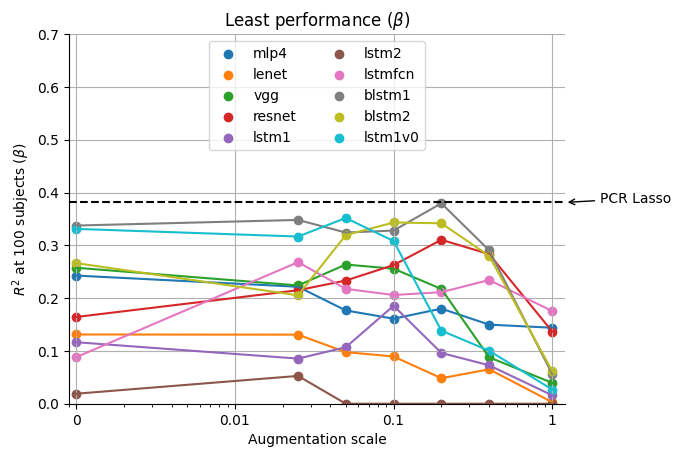

In [31]:
fig, ax = plt.subplots()
for ii in range(len(models)):
    ax.scatter([0.001, 1/40, 1/20, 1/10, 1/5, 1/2.5, 1], params[ii, :, 0], color=colors[ii], label=models[ii])
    ax.plot([0.001, 1/40, 1/20, 1/10, 1/5, 1/2.5, 1], params[ii, :, 0], color=colors[ii])
    ax.set_xscale("log")
    ax.set_xlim([0.0009, 1.2])

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [params[-1,0, 0], params[-1,0, 0]], 'k--')
ax.set_ylim([0, 0.7])
ax.set_ylabel(r"$R^2$ at 100 subjects ($\beta$)")
ax.set_xlabel("Augmentation scale")
ax.set_title(r"Least performance ($\beta$)")
ax.annotate("PCR Lasso",[1.2, params[-1 ,0, 0]], [2.0, params[-1, 0, 0]], arrowprops=dict(arrowstyle="->"))

ax.set_xticks([0.001, 0.01, 0.1, 1])
ax.set_xticklabels(["0", "0.01", "0.1", "1"])
plt.legend([],[], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid("on")
ax.legend(ncols=2, loc="upper center")
fig.savefig('/Users/arokem/Documents/papers/2022-convnets-tractometry/min_acc.png', bbox_inches='tight')

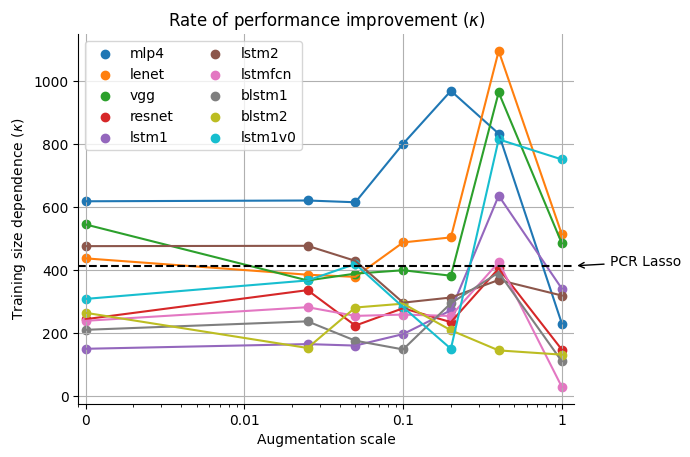

In [32]:
fig, ax = plt.subplots()
for ii in range(len(models)):
    ax.scatter([0.001, 1/40, 1/20, 1/10, 1/5, 1/2.5, 1], params[ii, :, 1], color=colors[ii], label=models[ii])
    ax.plot([0.001, 1/40, 1/20, 1/10, 1/5, 1/2.5, 1], params[ii, :, 1], color=colors[ii])
    ax.set_xscale("log")
    ax.set_xlim([0.0009, 1.2])

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [params[-1, 0, 1], params[-1, 0, 1]], 'k--')
# ax.set_ylim([0, 0.7])
ax.set_ylabel(r"Training size dependence ($\kappa$)")
ax.set_title(r"Rate of performance improvement ($\kappa$)")
ax.set_xlabel("Augmentation scale")
ax.annotate("PCR Lasso",[1.2, params[-1,0, 1]], [2.0, params[-1,0, 1]], arrowprops=dict(arrowstyle="->"))
ax.set_xticks([0.001, 0.01, 0.1, 1])
ax.set_xticklabels(["0", "0.01", "0.1", "1"])
ax.set_xlim([0.0009, 1.2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid("on")
ax.legend(ncols=2)

fig.savefig('/Users/arokem/Documents/papers/2022-convnets-tractometry/num_subjects.png', bbox_inches="tight")


In [33]:
# ff = sns.pointplot(data = pd.DataFrame(
#     dict(
#     model = len(augmentations) * (models),
#     max_acc = max_acc_models[:-1].T.ravel(), 
#     augmentation=np.array([0, 1/40, 1/20, 1/10, 1/5, 1/1] * (len(models))).reshape(6, -1).T.ravel(),
#     errors = max_acc_errors[:-1].T.ravel())), 
#            y="max_acc", 
#            x="augmentation",
#            hue="model", 
#            palette=colors)

# ff.plot([ff.get_xlim()[0], ff.get_xlim()[1]], [max_acc_models[-1, 0], max_acc_models[-1, 0]], 'k--')
# ff.set_ylabel(r"Maximal $R^2$ ($\alpha$)")
# ff.set_xlabel("Augmentation scale")
# ff.set_title(r"Best performance ($\alpha$)")
# plt.legend([],[], frameon=False)
# fig = ff.get_figure()

# # fig.savefig('/Users/arokem/Documents/conferences/2022-SfN/2022-SfN-CNN-poster/figures/max_acc.png', bbox_inches='tight')

In [34]:
# ff = sns.pointplot(data = pd.DataFrame(
#     dict(
#     model = len(augmentations) * (models),
#     max_acc = max_acc_models[:-1].T.ravel(), 
#     augmentation=np.array([0, 1/40, 1/20, 1/10, 1/5, 1/1] * (len(models))).reshape(6, -1).T.ravel(),
#     errors = max_acc_errors[:-1].T.ravel())), 
#            y="max_acc", 
#            x="augmentation",
#            hue="model", 
#            palette=colors)

# ff.plot([ff.get_xlim()[0], ff.get_xlim()[1]], [max_acc_models[-1, 0], max_acc_models[-1, 0]], 'k--')
# ff.set_ylabel(r"Maximal $R^2$ ($\alpha$)")
# ff.set_xlabel("Augmentation scale")
# ff.set_title(r"Best performance ($\alpha$)")
# plt.legend([],[], frameon=False)
# fig = ff.get_figure()
# # fig.savefig('/Users/arokem/Documents/conferences/2022-SfN/2022-SfN-CNN-poster/figures/max_acc.png', bbox_inches='tight')

In [35]:
# params.shape

In [36]:
# ff = sns.pointplot(data = pd.DataFrame(
#     dict(
#     model = len(augmentations) * (models),
#     min_acc = params[:-1, :, 0].T.ravel(), 
#     augmentation=np.array([0, 1/40, 1/20, 1/10, 1/5, 1] * (len(models))).reshape(6, -1).T.ravel())), 
#            y="min_acc", 
#            x="augmentation",
#            hue="model",
#            palette=colors)

# ff.plot([ff.get_xlim()[0], ff.get_xlim()[1]], [params[-1, 0, 0], params[-1, 0, 0]], 'k--')

# ff.set_ylabel(r"$R^2$ at 100 subjects ($\beta$)")
# ff.set_xlabel("Augmentation scale")
# ff.set_title(r"Least performance ($\beta$)")

# plt.legend([],[], frameon=False)
# fig = ff.get_figure()
# # fig.savefig('/Users/arokem/Documents/conferences/2022-SfN/2022-SfN-CNN-poster/figures/min_acc.png', bbox_inches='tight')

In [37]:
colors = np.vstack([colors, np.array([0, 0, 0])])

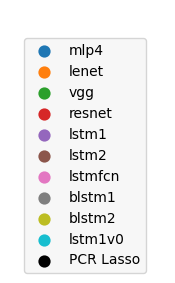

In [38]:
ff = sns.pointplot(data = pd.DataFrame(
    dict(
    model = len(augmentations) * (models + ["PCR Lasso"]),
    time_constant = params[:, :, 1].T.ravel(), 
    augmentation=np.array([0, 1/40, 1/20, 1/10, 1/5, 1/2.5, 1] * (len(models) + 1)).reshape(7, -1).T.ravel())), 
           y="time_constant", 
           x="augmentation",
           hue="model",
           palette=colors)

ff.plot([ff.get_xlim()[0], ff.get_xlim()[1]], [params[-1, 0, 1], params[-1, 0, 1]], 'k--')

ff.set_ylabel(r"Training size dependence ($\kappa$)")
ff.set_title(r"Performance improvement ($\kappa$)")
ff.set_xlabel("Augmentation scale")
plt.legend([],[], frameon=False)
fig = ff.get_figure()
figlegend_kwargs = dict(
        facecolor="whitesmoke",
        bbox_to_anchor=(0.5, 0.02),
        loc="upper center")
#fig.savefig('/Users/arokem/Documents/conferences/2022-SfN/2022-SfN-CNN-poster/figures/num_subjects.png', bbox_inches="tight")
leg = plt.figlegend(**figlegend_kwargs)
ff.xaxis.set_visible(False)
ff.yaxis.set_visible(False)
ff.set_frame_on(False)
ff.clear()
fig = ff.get_figure()
fig.set_size_inches([2, 0.25])
fig.savefig('/Users/arokem/Documents/papers/2022-convnets-tractometry/legend.png', bbox_inches="tight")


In [39]:
#df = pd.read_csv("/Users/arokem/source/pyAFQ/examples/tract_profiles.csv")

In [40]:
# fig, ax = plt.subplots()
# ax.plot(df[df["tractID"] == "ARC_L"]["dki_fa"].values, linewidth=2.0)
# ax.set_ylabel("Fractional Anisotropy(FA)")
# ax.set_xlabel("Distance along the bundle (%)")
# fig.savefig('/Users/arokem/Documents/papers/2022-convnets-tractometry/tract_profile.png', bbox_inches="tight")